In [1]:
from helpers import lasso_reg
%load_ext autoreload
%autoreload 2

from run import set_lambda, DATA_TRAIN_PATH, ret_classif_percentage, get_normalization_methods, \
    normalize_data, train
from proj1_helpers import load_csv_data
import numpy as np
PLOT_PATH = '../plots/'

# Do not waste time to save the result
lambdas = (1e-22, 1e-21, 5e-21, 1e-20, 5e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15,
           1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-2, 1)

trs = []
tes= []
tes_reg= []


y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
norm_method = get_normalization_methods(tX)
tX = normalize_data(tX, norm_method)
init_weights = np.random.random_sample((tX.shape[1], 1))

for lmbd in lambdas:
    set_lambda(lmbd)
    _ = train(tX, y)
    tr, te = ret_classif_percentage()
    print(tr)
    trs.append(tr)
    tes.append(te)

    w, _ = lasso_reg(y.reshape((-1, 1)), tX, init_weights ,40, 0.01, 1e-20)

    removed_features = np.where(w == 0)
    tX_reg = np.delete(tX, removed_features, axis=1)

    _ = train(tX_reg, y)
    _, te = ret_classif_percentage()
    tes_reg.append(te)

trs

Training set loss 0.3697219509718464; test set loss 8.73435616800419
Training set good classification 0.7917377777777778; test good classification 0.79616
0.7917377777777778
Training set loss 0.2954769420899192; test set loss 1.8971424670648793
Training set good classification 0.7996; test good classification 0.80464
Training set loss 0.2779410999132015; test set loss 0.29675656804597783
Training set good classification 0.8141111111111111; test good classification 0.81704
0.8141111111111111
Training set loss 0.2990419028067778; test set loss 0.37003443086314786
Training set good classification 0.79944; test good classification 0.80216
Training set loss 0.278773813178421; test set loss 0.313894687343901
Training set good classification 0.8130044444444444; test good classification 0.81668
0.8130044444444444
Training set loss 0.29268257010120513; test set loss 0.29107675439039515
Training set good classification 0.8011022222222223; test good classification 0.80344
Training set loss 0.2787

[0.7917377777777778,
 0.8141111111111111,
 0.8130044444444444,
 0.8136755555555556,
 0.8134222222222223,
 0.8112266666666667,
 0.8119155555555555,
 0.8043866666666667,
 0.80772,
 0.8047911111111111,
 0.8013066666666666,
 0.7998666666666666,
 0.7985022222222222,
 0.7975244444444445,
 0.7963777777777777,
 0.7924977777777777,
 0.7848933333333333,
 0.7783511111111111,
 0.7716577777777778,
 0.7641733333333334,
 0.7488977777777778,
 0.7263511111111111,
 0.7037155555555555,
 0.7037155555555555,
 0.66844]

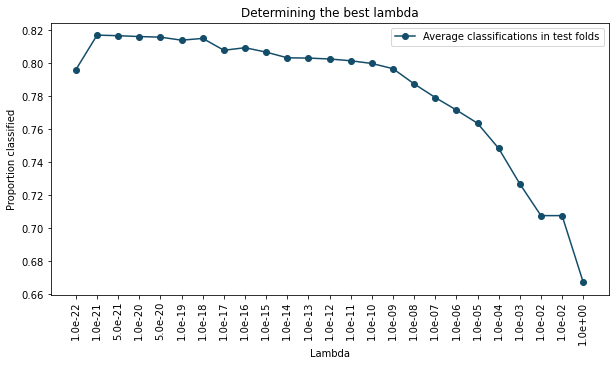

In [4]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(figsize=(10,5))

lns1 = ax.plot(np.arange(1,len(lambdas)+1), tes, color='#134d6a', label='Average classifications in test folds', marker='o')

ax.set_xlabel('Lambda')
ax.set_ylabel('Proportion classified')
ax.set_xticks(np.arange(1,len(lambdas)+1))
ax.set_xticklabels(labels=['%.1e' % x for x in lambdas], rotation=90)
ax.legend(loc='upper right')

fig.savefig(PLOT_PATH+"Determining the best lambda.pdf", bbox_inches='tight')

plt.title('Determining the best lambda')
plt.show()